In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Data and exploratory data analysis 
## Mckinsey Health care
https://www.analyticsvidhya.com/datahack/contest/mckinsey-analytics-online-hackathon/

## Problem Statement
"Your Client, a chain of hospitals aiming to create the next generation of healthcare for its patients, has retained McKinsey to help achieve its vision. The company brings the best doctors and enables them to provide proactive health care for its patients. One such investment is a Center of Data Science Excellence.

In this case, your client wants to have study around one of the critical disease "Stroke". Stroke is a disease that affects the arteries leading to and within the brain. A stroke occurs when a blood vessel that carries oxygen and nutrients to the brain is either blocked by a clot or bursts (or ruptures). When that happens, part of the brain cannot get the blood (and oxygen) it needs, so it and brain cells die.

Over the last few years, the Client has captured several health, demographic and lifestyle details about its patients. This includes details such as age and gender, along with several health parameters (e.g. hypertension, body mass index) and lifestyle related variables (e.g. smoking status, occupation type).

The Client wants you to predict the probability of stroke happening to their patients. This will help doctors take proactive health measures for these patients."

In [2]:
df = pd.read_csv("train_ajEneEa.csv")

In [3]:
df.shape

(43400, 12)

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [5]:
df.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [6]:
df = df.dropna()

In [7]:
len(df)

29072

In [8]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hypertension'}>],
       [<Axes: title={'center': 'heart_disease'}>,
        <Axes: title={'center': 'avg_glucose_level'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'stroke'}>, <Axes: >, <Axes: >]],
      dtype=object)

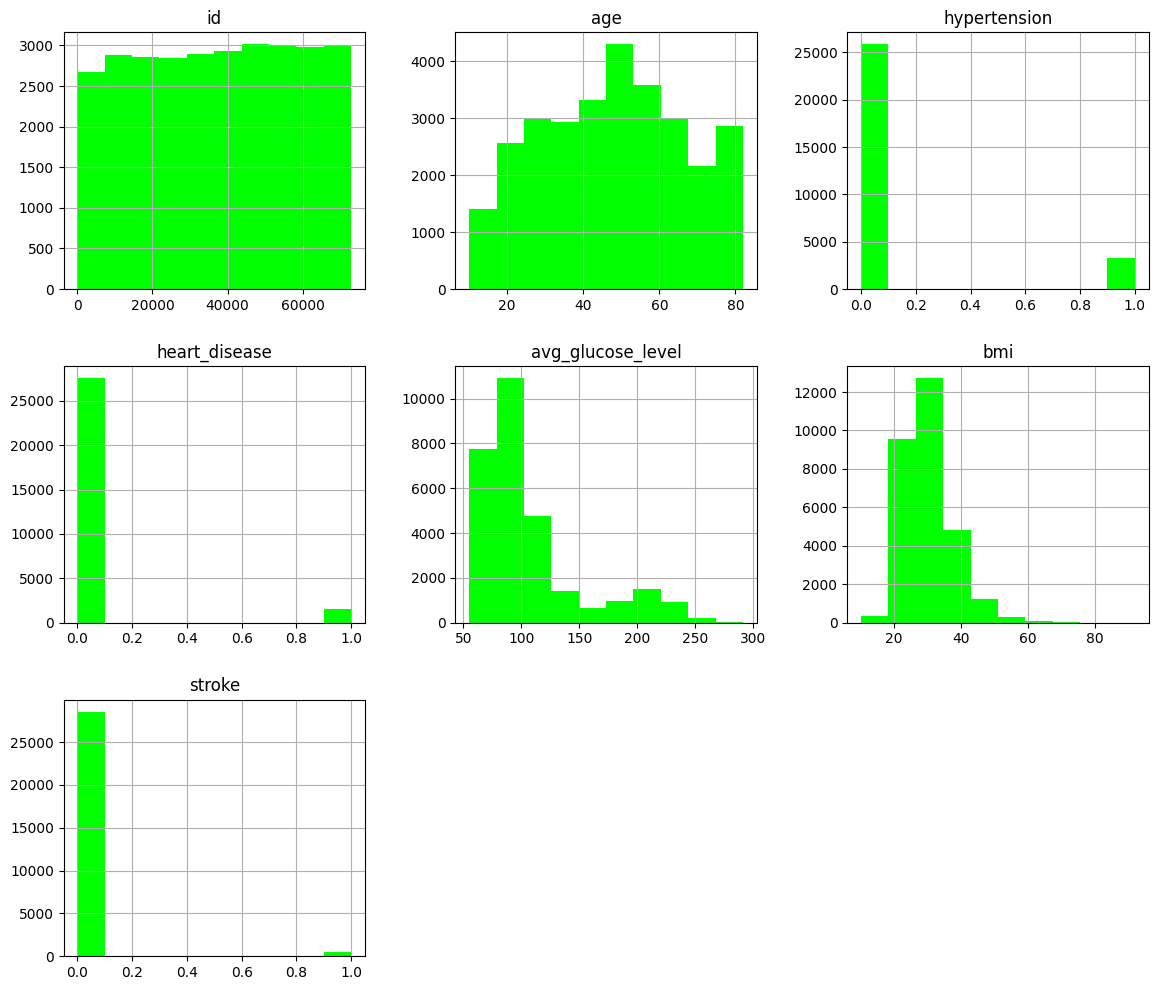

In [9]:
df.hist(figsize=(14, 12), color='lime')

In [12]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [13]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,30468,male,58.0,1,0,yes,private,urban,87.96,39.2,never_smoked,0
3,56543,female,70.0,0,0,yes,private,rural,69.04,35.9,formerly_smoked,0
6,52800,female,52.0,0,0,yes,private,urban,77.59,17.7,formerly_smoked,0
7,41413,female,75.0,0,1,yes,self-employed,rural,243.53,27.0,never_smoked,0
8,15266,female,32.0,0,0,yes,private,rural,77.67,32.3,smokes,0


In [14]:
categorical

['gender', 'ever_married', 'work_type', 'residence_type', 'smoking_status']

In [18]:
for col in categorical:
    print(df[col].unique())

['male' 'female' 'other']
['yes' 'no']
['private' 'self-employed' 'govt_job' 'children' 'never_worked']
['urban' 'rural']
['never_smoked' 'formerly_smoked' 'smokes']


In [23]:
dict_ever_married = {'no': 0, 'yes': 1}

In [24]:
df = df.replace({"ever_married": dict_ever_married})

/var/folders/3n/w9hnxcsd24l5hpgx8yrhfn840000gp/T/ipykernel_9454/1683808090.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({"ever_married": dict_ever_married})


In [42]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,30468,male,58.0,1,0,1,private,urban,87.96,39.2,never_smoked,0
3,56543,female,70.0,0,0,1,private,rural,69.04,35.9,formerly_smoked,0
6,52800,female,52.0,0,0,1,private,urban,77.59,17.7,formerly_smoked,0
7,41413,female,75.0,0,1,1,self-employed,rural,243.53,27.0,never_smoked,0
8,15266,female,32.0,0,0,1,private,rural,77.67,32.3,smokes,0


In [37]:
categorical = list(df.dtypes[df.dtypes == 'object'].index)
numerical = list(df.dtypes[df.dtypes != 'object'].index)

In [38]:
categorical

['gender', 'work_type', 'residence_type', 'smoking_status']

In [39]:
numerical

['id',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'avg_glucose_level',
 'bmi',
 'stroke']

In [43]:
numerical = numerical[1:-1]

In [44]:
numerical

['age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'avg_glucose_level',
 'bmi']

In [40]:
df.stroke.value_counts(normalize=True)

stroke
0    0.98115
1    0.01885
Name: proportion, dtype: float64

In [41]:
df.stroke.value_counts()

stroke
0    28524
1      548
Name: count, dtype: int64

The dataset is very unbalanced and later I use an under-sampling method to make classes more balanced

# Feature importance: stroke rate and risk ratio

In [46]:
global_stroke = df.stroke.mean()
global_stroke

0.018849752339020365

In [47]:
for c in categorical:
    print(c)
    df_group = df.groupby(c).stroke.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_stroke
    df_group['risk'] = df_group['mean'] / global_stroke
    display(df_group)
    print()
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.017533,17852,-0.001317,0.930147
male,0.020958,11213,0.002108,1.111835
other,0.000000,7,-0.018850,0.000000




work_type


,mean,count,diff,risk
work_type,,,,
children,0.000000,617,-0.018850,0.000000
govt_job,0.015729,4196,-0.003120,0.834455
never_worked,0.000000,101,-0.018850,0.000000
private,0.016408,18954,-0.002442,0.870470
self-employed,0.032859,5204,0.014010,1.743224




residence_type


,mean,count,diff,risk
residence_type,,,,
rural,0.018581,14477,-0.000269,0.985753
urban,0.019116,14595,0.000266,1.014132




smoking_status


,mean,count,diff,risk
smoking_status,,,,
formerly_smoked,0.025356,7099,0.006506,1.345147
never_smoked,0.016257,15747,-0.002593,0.862455
smokes,0.017989,6226,-0.000861,0.954340


# Feature importance: mutual information

In [48]:
from sklearn.metrics import mutual_info_score

In [49]:
def mutual_info_stroke_score(series):
    return mutual_info_score(series, df.stroke)

In [50]:
mi = df[categorical].apply(mutual_info_stroke_score)
mi.sort_values(ascending=False)

work_type         0.001399
smoking_status    0.000360
gender            0.000079
residence_type    0.000002
dtype: float64

# Feature importance: correlation

In [51]:
df[numerical].corrwith(df.stroke) #.abs()

age                  0.154060
hypertension         0.078684
heart_disease        0.105149
ever_married         0.047738
avg_glucose_level    0.075452
bmi                 -0.004029
dtype: float64

In [52]:
# build a heat map of correlations
correlation = df[numerical].corr()
correlation.style.background_gradient(cmap='coolwarm')

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi
age,1.000000,0.257564,0.247434,0.547287,0.228294,0.106416
hypertension,0.257564,1.000000,0.117980,0.130813,0.154063,0.129291
heart_disease,0.247434,0.117980,1.000000,0.095246,0.137489,0.022754
ever_married,0.547287,0.130813,0.095246,1.000000,0.117359,0.143328
avg_glucose_level,0.228294,0.154063,0.137489,0.117359,1.000000,0.176897
bmi,0.106416,0.129291,0.022754,0.143328,0.176897,1.000000


# Setting up the validation framework

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [55]:
len(df_train), len(df_val), len(df_test)

(17442, 5815, 5815)

In [56]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [57]:
y_train = df_train.stroke.values
y_val = df_val.stroke.values
y_test = df_test.stroke.values

del df_train['stroke']
del df_val['stroke']
del df_test['stroke']

In [58]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

# One-hot encoding

In [59]:
from sklearn.feature_extraction import DictVectorizer

In [91]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [61]:
# https://stackoverflow.com/questions/22804009/saving-sgd-classifier-with-dictvectorizer-vocabulary
import pickle
# save DictVectorizer
with open('dv.pkl','wb') as f:
    pickle.dump(dv,f)

# RandomUnderSampler

Undersampling involves reducing the number of samples in the majority class to balance the dataset. By removing instances of the overrepresented class, the dataset becomes more balanced, which can help prevent models from being biased toward the majority class.

In [62]:
# https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html
from imblearn.under_sampling import RandomUnderSampler # pip3 install imbalanced-learn

In [63]:
rus = RandomUnderSampler(random_state=42)

In [64]:
X_rus, y_rus = rus.fit_resample(X_train, y_train)

In [66]:
len(X_rus)

688

# Training logistic regression

In [67]:
from sklearn.linear_model import LogisticRegression

In [79]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

In [80]:
#model.fit(X_train, y_train)
model.fit(X_rus, y_rus)

LogisticRegression(max_iter=1000, solver='liblinear')

In [81]:
y_pred = model.predict_proba(X_val) #[:, 1]

In [82]:
y_pred

array([[0.69779523, 0.30220477],
       [0.34424641, 0.65575359],
       [0.38640495, 0.61359505],
       ...,
       [0.35876615, 0.64123385],
       [0.48611877, 0.51388123],
       [0.9564428 , 0.0435572 ]])

In [83]:
y_pred = model.predict_proba(X_val)[:, 1]

In [84]:
y_pred

array([0.30220477, 0.65575359, 0.61359505, ..., 0.64123385, 0.51388123,
       0.0435572 ])

In [85]:
roc_auc_score(y_val, y_pred)

0.8268375586977451

# Hyperparameter Tuning

In [76]:
from sklearn.model_selection import KFold
from tqdm.auto import tqdm

/Users/irakokoshko/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [77]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [78]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [87]:
n_splits = 5

for C in tqdm([0.000001, 0.00001, 0.0001, 0.001, 0.01, 1, 10, 100]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.stroke.values
        y_val = df_val.stroke.values

        df_rus, y_rus = rus.fit_resample(df_train, y_train) # undersampling procedure

        dv, model = train(df_rus, y_rus, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

 12%|█████▋                                       | 1/8 [00:00<00:02,  3.25it/s]

C=1e-06 0.797 +- 0.016


 25%|███████████▎                                 | 2/8 [00:00<00:01,  3.07it/s]

C=1e-05 0.784 +- 0.027


 38%|████████████████▉                            | 3/8 [00:01<00:01,  2.75it/s]

C=0.0001 0.778 +- 0.012


 50%|██████████████████████▌                      | 4/8 [00:01<00:01,  2.62it/s]

C=0.001 0.779 +- 0.008


 62%|████████████████████████████▏                | 5/8 [00:01<00:01,  2.47it/s]

C=0.01 0.796 +- 0.008


 75%|█████████████████████████████████▊           | 6/8 [00:02<00:00,  2.46it/s]

C=1 0.830 +- 0.015


 88%|███████████████████████████████████████▍     | 7/8 [00:02<00:00,  2.52it/s]

C=10 0.829 +- 0.016


100%|█████████████████████████████████████████████| 8/8 [00:03<00:00,  2.56it/s]

C=100 0.829 +- 0.017


C=1 leads to the best mean score

# Training and tuning RandomForestClassifier

In [89]:
from sklearn.ensemble import RandomForestClassifier

In [92]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [93]:
X_rus, y_rus = rus.fit_resample(X_train, y_train)

In [94]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_rus, y_rus)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    scores.append((n, auc))

In [95]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])

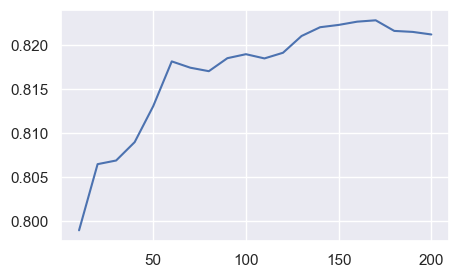

In [101]:
plt.figure(figsize=(5,3))
plt.plot(df_scores.n_estimators, df_scores.auc)

The accuracy of logistic regression and random forest models are almost the same. I will save and use logistic regression.

In [102]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)

model.fit(X_rus, y_rus)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [103]:
# save classifier
with open('model_LR.pkl','wb') as f:
    pickle.dump(model,f)

# Using/testing the model

In [104]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')

In [106]:
user = dicts_test[-1]
user

{'gender': 'male',
 'work_type': 'govt_job',
 'residence_type': 'urban',
 'smoking_status': 'never_smoked',
 'age': 51.0,
 'hypertension': 1,
 'heart_disease': 0,
 'ever_married': 1,
 'avg_glucose_level': 82.2,
 'bmi': 34.2}

In [110]:
X_user = dv.transform([user])

In [111]:
model.predict_proba(X_user)[0, 1]

0.4219938265207051

In [112]:
y_test[-1]

0